In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

%matplotlib inline

In [3]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [4]:
y = df['salario']
X = df.drop(['salario', 'noasiat', 'postgrad'], axis=1)

In [5]:
reg_lin = sm.OLS(y,sm.add_constant(X)).fit()

In [6]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           7.37e-38
Time:                        12:17:54   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

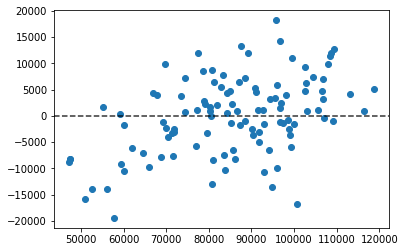

In [7]:
fig, ax = plt.subplots()

y_pred = reg_lin.predict(sm.add_constant(X))

ax.scatter(y, y-y_pred)

plt.axhline(y=0, color='black', alpha=0.8, linestyle='--')

In [8]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [9]:
# Crear distribucion de los cuartiles de los salarios para entender como podriamos hacer una analisis profundo de esta variable
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [77]:
# Si queremos saber cuales son las variables que influyen para que una persona gane un salario superior a 96mil
y=np.where(df['salario'] > 96000, 1, 0)
X=df.drop(['salario'], axis=1)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

[Text(0, 0.5, 'y'), Text(0.5, 0, 'Salario')]

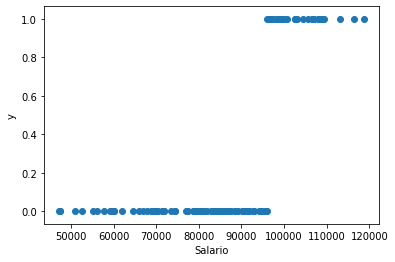

In [52]:
fig, ax = plt.subplots()
ax.scatter(df.salario, y)
ax.set(xlabel='Salario', ylabel='y')

In [54]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_estimado = reg_log.predict(X)
y_estimado1 = reg_log.predict_proba(X)[:,1]

In [75]:
y_estimado

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [72]:
y_estimado1, X

(array([5.60461822e-01, 2.18511060e-02, 3.40713796e-01, 1.78408868e-02,
        3.29151263e-01, 7.96981996e-01, 7.75217424e-02, 5.79840206e-01,
        1.96337424e-01, 2.23688334e-02, 9.38905048e-02, 1.52477253e-01,
        4.60623344e-03, 6.80736034e-01, 2.36672162e-01, 2.32983883e-01,
        2.64877181e-02, 4.08086905e-01, 6.22718055e-01, 8.19254265e-04,
        6.79749578e-01, 1.77262355e-01, 4.84578109e-01, 1.19118594e-02,
        4.95105410e-03, 2.22525593e-02, 5.72691371e-01, 1.06357265e-01,
        1.48324507e-02, 3.76063257e-01, 4.46845890e-01, 5.03537624e-01,
        4.76812772e-03, 5.53016419e-01, 1.57016516e-01, 5.90365186e-01,
        7.48524569e-02, 6.18930473e-01, 2.79821150e-01, 4.16278991e-01,
        3.02424904e-01, 1.51683200e-02, 5.59124020e-01, 2.46196442e-01,
        1.44120593e-02, 6.68076012e-01, 7.87662744e-01, 1.26051430e-01,
        8.57368843e-02, 6.64205865e-01, 9.58222158e-01, 9.66547648e-01,
        2.21804096e-02, 4.09341892e-02, 6.53760730e-01, 3.557119

In [74]:
y == y_estimado

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [80]:
metrics.accuracy_score(y,reg_log.predict(X))

0.9090909090909091

In [81]:
X.columns

Index(['noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')